# What we did in class

# Linear Regression and Friends

I want to talk about linear regression computationally. You need to understand linear regression every which way, up and down. WHY? 

    (1) Can apply it very widely

    (2) Often works pretty darn well

    (3) Can build non-linear regression on top of linear regression

    (4) Lots of idea of linear regression used everywhere

    (5) Many different approaches

    (6) Good theoretical analysis

    (7) Great examples on what goes wrong that is useful elsewhere

    (8) Common language: Almost every one knows it

    (9) Simple: Occam's razor -- why use something more complex if this works so try first

There are so many reasons why it is the "go to thing" ... somebody running a deep learning model when linear regression works as well is probably a moron. 

## What is a regression problem?

We have data a variable which was observed to have values $x_1, x_2, \ldots , x_n$. When we measured $x_i$ we also measured $y_i$ and we have reason to think that there is a functional relationship $f(x)=y$. For example maybe $x$ is altitude and $y$ is air pressure. 

Maybe $f$ is a **linear** function/relationship which means there is a scaling coefficient $m$ and an offset $b$ so that 

$$y = f(x) = mx + b$$. 

Perhaps this is a bit to optimistic. We know that even at seal level pressure can vary a bit so we include an error term ${\bf \varepsilon}(x)$ which we will think of as random noise, partly because we don't know how to model it (yet). So really with this model we are guessing that 

$$y = f(x) = mx + b + {\bf \varepsilon}(x)$$.

Here this error term is pretty small. Lets just simulate what this would look like.

## Finding the slope

We learned linear algebra for a reason. We can put all our measurements in a matrices $\tilde{X}$, $\tilde{Y}$, and noise $E$ like this

$$ 
\tilde{X} = \left[ 
\begin{array}{c}
   x_1 \\
   x_2 \\
   \vdots \\
   x_n
\end{array}
\right],
Y = \left[ 
\begin{array}{c}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
\end{array}
\right],
E = \left[ 
\begin{array}{c}
   \varepsilon_1 \\
   \varepsilon_2 \\
   \vdots \\
   \varepsilon_n
\end{array}
\right],
$$

then we get the nice little formula (abusing notation)

$$ Y = (\tilde{X})*m + b + E $$

where $m$ just multiplies each row and $b$ adds to each row. For various reasons we do a cute trick of replacing $\tilde{X}$ with a matrix with a column of $1$s and write $m$ and $b$ as a coefficient matrix $C$ like this:

$$ X = 
\left[ 
\begin{array}{ccc}
   x_1 & & 1\\
   x_2 & & 1\\
   &\vdots & \\
   x_n &  &1
\end{array}
\right],
C = \left[
\begin{array}{c}
   m \\
   b
\end{array}
\right]
$$

Then the equation nicely becomes

$$ Y = X C + E $$

Basically we want to try and solve (approximately) $Y=XC$ for $C$ to recover the slope $m$ and offset $b$. But HOW??
If only $X$ were a square matrix with an inverse!! .... then

$$ C = X^{-1} Y$$

but alas ... it is not square. BUT!!! There is a bit of a trick. What if we multiple both sides of the equation $XC=Y$ by $X^T$, the transpose of $X$. Well then $X^T X$ is a square $2 \times 2$ matrix. For typical (random) $X$ that will almost never be singular unless all the values of $x_i$ are the same!!! So if we think there is a solution to $XC=Y$ for $C$ then it must be true that

$$ X^T X C = X^T Y \implies C = (X^T X)^{-1} X^T Y $$

So $\hat{C} = (X^T X)^{-1} X^T Y$ implements and approximate solution when $E$ is not zero. It is the solution that minimizes the least square error. In other words if we defined the val $\hat{Y} = X\hat{C}$ and the error vector

$$E(C) = Y-\hat{Y} = Y - X\hat{C}$$ 

then the mean of square errors 

$$\mbox{MSE}(C) = \frac{1}{n}||E(C)||^2 = (\frac{1}{n}) E(C)^T E(C) = (\frac{1}{n}) \sum_i (\hat{y}_i - y)^2 $$

is the smallest it can be for all possible choices of $m$ and $b$. The smaller the noise the better the solution because the difference between the predicted $f(x)$ and the model is just the error $E$. Lets see this in code.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
num_points = 100
np.random.seed(42)
xs = np.random.random((num_points,))
noise_level = 0.1
es = np.random.randn(num_points)*noise_level
m = 2.718
b = 3.141
ys = xs*m + b + es

Text(0.5,1,'Synthetic nearly linear data')

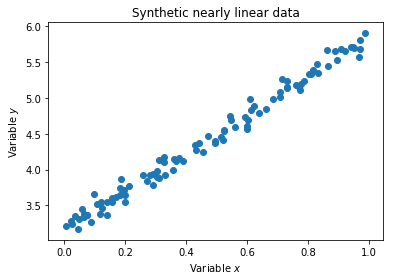

In [6]:
fig, ax = plt.subplots()
ax.scatter(xs,ys)
ax.set_xlabel('Variable $x$')
ax.set_ylabel('Variable $y$')
ax.set_title('Synthetic nearly linear data')

Text(0.5,1,'Synthetic nearly linear data')

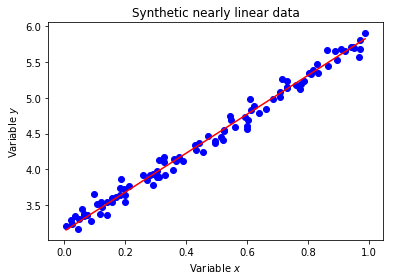

In [8]:
fig, ax = plt.subplots()
ax.scatter(xs,ys,color='b')
ax.plot([xs.min(),xs.max()],[xs.min()*m+b,xs.max()*m+b],'r')
ax.set_xlabel('Variable $x$')
ax.set_ylabel('Variable $y$')
ax.set_title('Synthetic nearly linear data')

## Finding the linear regression

In [10]:
X = np.hstack([xs.reshape((len(xs),1)),np.ones((len(xs),1))])
X.shape

(100, 2)

In [13]:
Y = ys.reshape((len(ys),1))
Y.shape

(100, 1)

In [15]:
Chat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T),Y)
Chat

array([[2.67202268],
       [3.16250962]])

In [17]:
yshat = np.dot(X,Chat)

In [23]:
Chat.shape

(2, 1)

In [25]:
Chat

array([[2.67202268],
       [3.16250962]])

Text(0.5,1,'Synthetic nearly linear data')

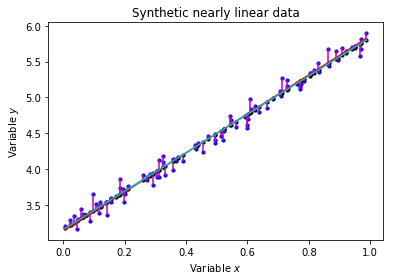

In [24]:
fig, ax = plt.subplots()
ax.scatter(xs,ys,color='b',s=10)
ax.scatter(xs,yshat,color='k',s=10)
ax.plot([xs.min(),xs.max()],[xs.min()*m+b,xs.max()*m+b],'r')
ax.plot(np.vstack([xs,xs]),np.vstack([np.squeeze(ys),np.squeeze(yshat)]),color='m')
ax.plot([xs.min(),xs.max()],[xs.min()*Chat[0][0]+Chat[1][0],xs.max()*Chat[0][0]+Chat[1][0]],'c')

ax.set_xlabel('Variable $x$')
ax.set_ylabel('Variable $y$')
ax.set_title('Synthetic nearly linear data')

## Using numpy library linalg

We don't need to solve our linear regression ourselves. We have lots of libraries to do this. They often have interesting useful options.

In [27]:
np.linalg.lstsq(X,Y)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([[2.67202268],
        [3.16250962]]),
 array([0.80658456]),
 2,
 array([11.12613263,  2.66038737]))

In [30]:
m, b = np.linalg.lstsq(X,Y)[0]
m[0],b[0]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(2.672022677287696, 3.162509615754675)

In [31]:
np.linalg.lstsq?

## Using the scipy library stats

Scipy has a stats library that has lost of useful statistics stuff.

In [32]:
from scipy import stats

In [33]:
stats.linregress(xs,ys)

LinregressResult(slope=2.6720226772876967, intercept=3.162509615754675, rvalue=0.9936146287741067, pvalue=1.1078627512499249e-94, stderr=0.030649458514612753)

In [34]:
m, b, r_value, p_value, std_err = stats.linregress(xs,ys)
m, b

(2.6720226772876967, 3.162509615754675)

In [35]:
stats.linregress?

## Using scikit learn (machine learning library)

Here we see that first you create/fit a model. Then you can extract its coefficients. You could weight data if some data was less certain than other data.

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
reg = LinearRegression().fit(xs.reshape(len(xs),1),ys)

In [39]:
reg.coef_

array([2.67202268])

In [40]:
reg.intercept_

3.162509615754675

In [41]:
reg.score(xs.reshape(len(xs),1),ys)

0.9872700305139059

In [42]:
LinearRegression?

# Using Statsmodels

For linear regression you probably get the most analysis and flexibility in statmodels. It works similar to sklearn but more directly.

In [43]:
import statsmodels.api as sm

In [44]:
model = sm.OLS(ys,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7600.
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           1.11e-94
Time:                        22:25:54   Log-Likelihood:                 99.112
No. Observations:                 100   AIC:                            -194.2
Df Residuals:                      98   BIC:                            -189.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6720      0.031     87.180      0.0

In [45]:
sm.OLS?

## Multi-linear regression on the boston housing data set

We don't need to assume we have only two variables. We can assume we have several and still do linear regression. If we had $m$ and $b$ before lets now have a bunch of variables so lets call the offset $c_0$ and the others $c_1$, ... , $c_k$. The model we would be trying to figure out would have the form

$$ y = c_0 + c_1 x_1 + c_2 x_2 + \cdots c_l x_m $$

This gets a bit messy because now $x_i$ is not an observation but a variable! Thats because we have lots like "age" or "tax" ... not just one ... we have $m$. We need another index for observations. So now it looks like

$$ y_i = c_0 + c_1 x_{i,1} + c_2 x_{i,2} + \cdots c_l x_{i,k} $$

where $x_{i,j}$ is our data matrix, where $i$ indexes observations and $j$ indexes different variables. Note that it still looks like a dot product between the $C$ and the $X$ so we can **still** write $X=CY$ as an approximation, end everything else works exactly the same way. Lets use the sklearn version.

In [46]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [47]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
lm = LinearRegression()
lm.fit(bos.iloc[:,0:-1],bos.iloc[:,-1])
y_pred = lm.predict(bos.iloc[:,0:-1])

Text(0,0.5,'predicted price')

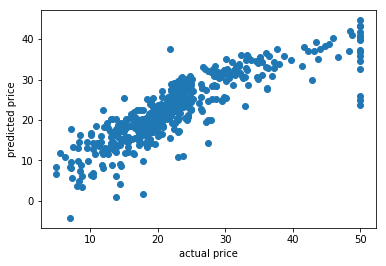

In [53]:
plt.scatter(bos.iloc[:,-1],y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")